In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 [==============================] - 0s 1us/step


In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 21ms/step - loss: 2.4991 - accuracy: 0.5466 - val_loss: 1.6432 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.3694 - accuracy: 0.7151 - val_loss: 1.2803 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0241 - accuracy: 0.7766 - val_loss: 1.1247 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8094 - accuracy: 0.8244 - val_loss: 1.0237 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6453 - accuracy: 0.8632 - val_loss: 1.0309 - val_accuracy: 0.7610
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5165 - accuracy: 0.8951 - val_loss: 0.9362 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4173 - accuracy: 0.9118 - val_loss: 0.9044 - val_accuracy: 0.8150
Epoch 8/20
16

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

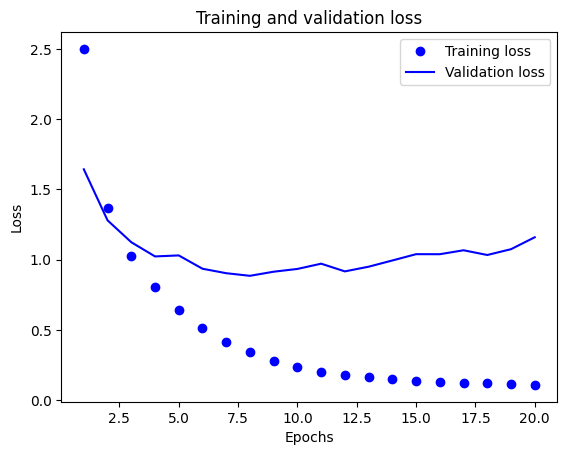

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

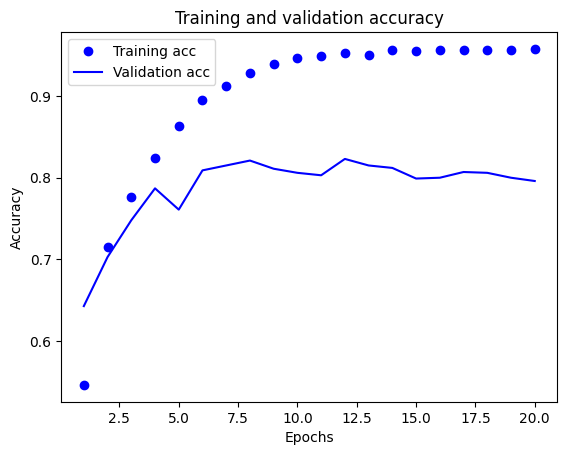

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 0s 20ms/step - loss: 2.7128 - acc: 0.5175 - val_loss: 1.8334 - val_acc: 0.6140
Epoch 2/8
16/16 [==============================] - 0s 14ms/step - loss: 1.4960 - acc: 0.6899 - val_loss: 1.3544 - val_acc: 0.6980
Epoch 3/8
16/16 [==============================] - 0s 14ms/step - loss: 1.0996 - acc: 0.7642 - val_loss: 1.1559 - val_acc: 0.7530
Epoch 4/8
16/16 [==============================] - 0s 15ms/step - loss: 0.8660 - acc: 0.8147 - val_loss: 1.0559 - val_acc: 0.7850
Epoch 5/8
16/16 [==============================] - 0s 15ms/step - loss: 0.6923 - acc: 0.8545 - val_loss: 1.0080 - val_acc: 0.8010
Epoch 6/8
16/16 [==============================] - 0s 14ms/step - loss: 0.5576 - acc: 0.8834 - val_loss: 0.9417 - val_acc: 0.8150
Epoch 7/8
16/16 [==============================] - 0s 15ms/step - loss: 0.4531 - acc: 0.9044 - val_loss: 0.9245 - val_acc: 0.8130
Epoch 8/8
71/71 [==============================] - 0s 1ms/step - loss: 0.9890 - acc: 0.782

In [14]:
results

[0.9890257120132446, 0.7827248573303223]

In [15]:
model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


array([[1.19368655e-04, 8.16856569e-04, 4.21613455e-04, ...,
        3.25936999e-04, 1.24229573e-05, 6.64488616e-05],
       [3.36269103e-03, 1.16134819e-03, 2.27149780e-04, ...,
        4.76049172e-05, 1.79477794e-07, 1.58386192e-05],
       [1.03522334e-02, 4.44046527e-01, 1.61919910e-02, ...,
        2.91719544e-03, 1.03945938e-04, 6.43526029e-04],
       ...,
       [1.40172715e-05, 6.23890315e-04, 1.35136492e-04, ...,
        1.29496781e-04, 8.98866492e-05, 6.28199778e-05],
       [3.02454759e-03, 6.95020258e-02, 1.04221478e-02, ...,
        2.88689253e-03, 1.40220713e-04, 1.34938152e-03],
       [1.89010974e-03, 5.78255832e-01, 2.54539847e-02, ...,
        1.30557816e-03, 7.27797233e-05, 2.16179717e-04]], dtype=float32)